In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

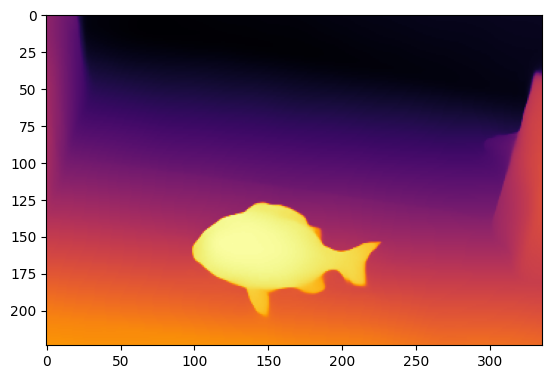

In [2]:
img = cv2.imread('./depth/IMG2_depth.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

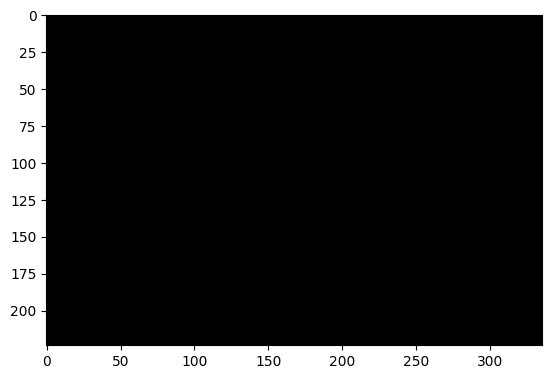

In [3]:
mask = np.zeros(img.shape[:2], dtype=np.uint8)
plt.imshow(mask, cmap='gray')

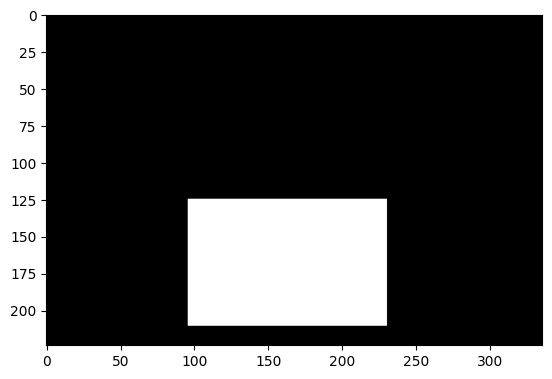

In [4]:
polly_points = np.array([(96,125), (230, 125), (230, 210), (96, 210)], dtype=np.int32)
cv2.fillPoly(mask, [polly_points], (255,2555,255))
plt.imshow(mask, cmap='gray')

True

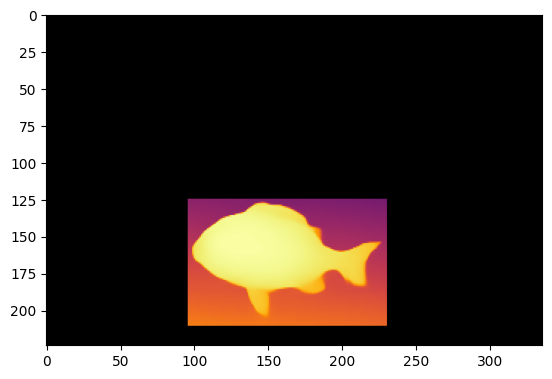

In [5]:
roi = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(roi, cmap='gray')
cv2.imwrite('./depth/roi.png', roi)

In [6]:
img_r = roi.copy()
img_g = roi.copy()
img_b = roi.copy()

In [7]:
img_r = roi[:, :, 0]
img_g = roi[:, :, 1]
img_b = roi[:, :, 2]

In [8]:
img_rg = img_r - img_g
img_gb = img_g - img_b
img_br = img_b - img_r

In [9]:
img_rg[mask == 0] = 255
img_gb[mask == 0] = 255
img_br[mask == 0] = 255

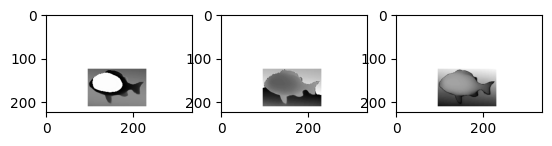

In [10]:
plt.subplot(1, 3, 1)
plt.imshow(img_rg, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(img_gb, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(img_br, cmap='gray')

In [11]:
cv2.imwrite('./depth/img_rg.png', img_rg)
cv2.imwrite('./depth/img_gb.png', img_gb)
cv2.imwrite('./depth/img_br.png', img_br)

True

True

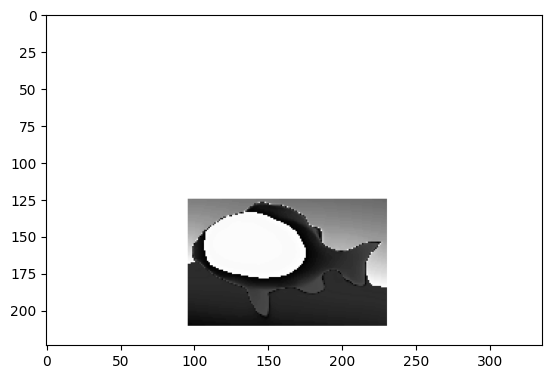

In [12]:
img_m = cv2.max(img_rg, img_gb, img_br)
plt.imshow(img_m, cmap='gray')
cv2.imwrite('./depth/img_m.png', img_m)

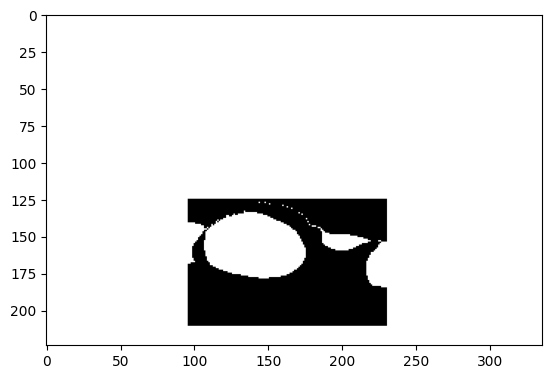

In [13]:
ret, thr = cv2.threshold(img_m, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(thr, cmap='gray')

True

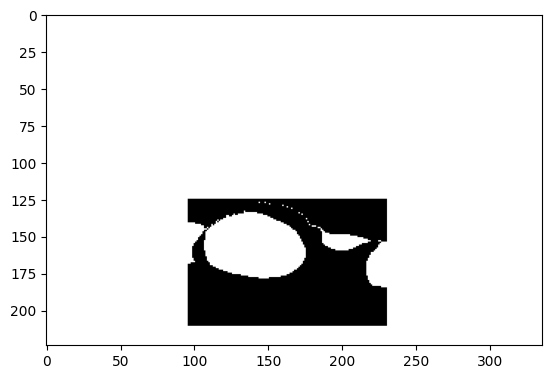

In [14]:
thr[mask == 0] = 255
plt.imshow(thr, cmap='gray')
cv2.imwrite('./depth/thr.png', thr)

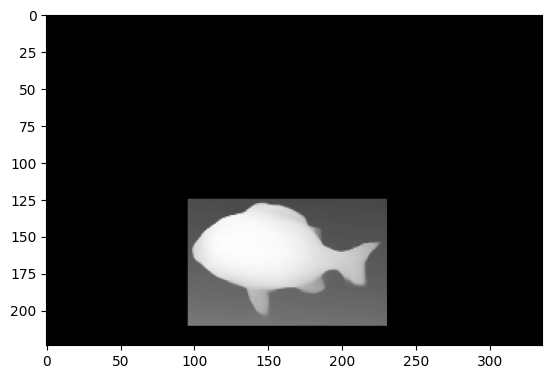

In [18]:
gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

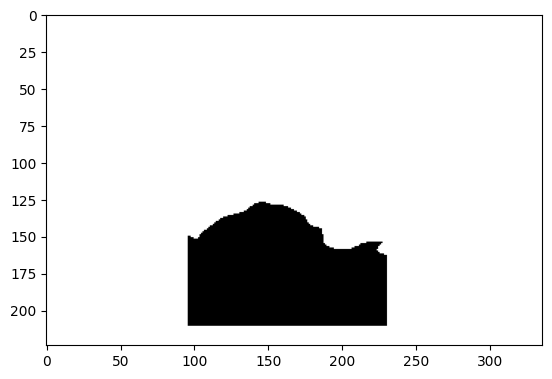

In [21]:
ret, thr = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
plt.imshow(thr, cmap='gray')